In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
from requests import Session

In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [3]:
def api_runner():
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '666d2c1d-3210-42d3-b8ed-918f3694111d',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'/Users/wolf/Desktop/Coding/Data Analyst/Projects/Python/API.csv'):
        df.to_csv(r'/Users/wolf/Desktop/Coding/Data Analyst/Projects/Python/API.csv', header='column_names')
    else:
        df.to_csv(r'/Users/wolf/Desktop/Coding/Data Analyst/Projects/Python/API.csv', mode='a', header=False)

In [4]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)
exit()

API Runner completed
API Runner completed


KeyboardInterrupt: 

In [17]:
df = pd.read_csv(r'/Users/wolf/Desktop/Coding/Data Analyst/Projects/Python/API.csv')

In [19]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12039,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.985236e+07,1.985236e+07,False,NaN,1,NaN,NaN,NaN,2025-04-17T02:33:00.000Z,84141.698736,2.836533e+10,-0.7643,-0.305125,0.340061,2.172296,0.797576,-13.816303,-17.313147,1.670411e+12,63.0502,1.766976e+12,NaN,2025-04-17T02:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-17 08:04:15.236171
1,1,1027,Ethereum,ETH,ethereum,10134,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.206981e+08,1.206981e+08,True,NaN,2,NaN,NaN,NaN,2025-04-17T02:33:00.000Z,1587.155608,1.507200e+10,13.8388,-0.226233,-0.732763,-3.298814,-17.028017,-41.185695,-53.088377,1.915667e+11,7.2307,1.915667e+11,NaN,2025-04-17T02:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-17 08:04:15.236171
2,2,825,Tether USDt,USDT,tether,124358,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.448050e+11,1.480324e+11,True,NaN,3,NaN,NaN,NaN,2025-04-17T02:32:00.000Z,1.000279,5.808977e+10,4.2545,0.042127,0.044731,0.072726,0.034534,0.009461,0.046405,1.448454e+11,5.4672,1.480737e+11,NaN,2025-04-17T02:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-17 08:04:15.236171
3,3,52,XRP,XRP,xrp,1589,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.833814e+10,9.998625e+10,False,NaN,4,NaN,NaN,NaN,2025-04-17T02:33:00.000Z,2.072510,3.406023e+09,10.7895,-0.553711,-0.667776,2.492279,-10.046035,-25.525675,-37.393950,1.209064e+11,4.5637,2.072510e+11,NaN,2025-04-17T02:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-17 08:04:15.236171
4,4,1839,BNB,BNB,bnb,2470,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.408910e+08,1.408910e+08,False,NaN,5,NaN,NaN,NaN,2025-04-17T02:33:00.000Z,582.867436,1.416809e+09,5.1332,-0.241401,0.012537,0.615330,-7.628659,-11.565989,-18.648975,8.212080e+10,3.0997,8.212080e+10,NaN,2025-04-17T02:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-17 08:04:15.236171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,10,3957,UNUS SED LEO,LEO,unus-sed-leo,59,2019-05-21T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'disco...",NaN,9.236814e+08,9.852395e+08,False,NaN,11,NaN,NaN,NaN,2025-04-17T02:45:00.000Z,9.434835,2.320399e+06,19.6819,0.567902,1.260724,0.560929,-1.674738,-3.564265,-3.206114,8.714782e+09,0.3294,9.295572e+09,NaN,2025-04-17T02:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0x2af5d2ad76741191d15dfe7bf6ac92d4bd912ca3,2025-04-17 08:16:29.339233
71,11,1975,Chainlink,LINK,chainlink,1990,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",NaN,6.571000e+08,1.000000e+09,False,NaN,12,NaN,NaN,NaN,2025-04-17T02:45:00.000Z,12.370029,2.886025e+08,-5.2277,-0.381563,0.163879,-0.434182,-11.052722,-34.381852,-47.791744,8.128346e+09,0.3072,1.237003e+10,NaN,2025-04-17T02:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2025-04-17 08:16:29.339233
72,12,5805,Avalanche,AVAX,avalanche,906,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",7.157487e+08,4.160354e+08,4.527049e+08,False,NaN,13,NaN,NaN,NaN,2025-04-17T02:44:00.000Z,18.868895,2.275559e+08,-16.5332,-0.206806,0.006446,3.3095

In [21]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [23]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12039,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19852362.00000,19852362.00000,False,NaN,1,NaN,NaN,NaN,2025-04-17T02:33:00.000Z,84141.69874,28365330789.98917,-0.76430,-0.30513,0.34006,2.17230,0.79758,-13.81630,-17.31315,1670411462606.14673,63.05020,1766975673460.37012,NaN,2025-04-17T02:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-17 08:04:15.236171
1,1,1027,Ethereum,ETH,ethereum,10134,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120698109.34015,120698109.34015,True,NaN,2,NaN,NaN,NaN,2025-04-17T02:33:00.000Z,1587.15561,15072003496.24841,13.83880,-0.22623,-0.73276,-3.29881,-17.02802,-41.18569,-53.08838,191566681068.08511,7.23070,191566681068.09000,NaN,2025-04-17T02:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-17 08:04:15.236171
2,2,825,Tether USDt,USDT,tether,124358,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,144804996163.49295,148032435825.05209,True,NaN,3,NaN,NaN,NaN,2025-04-17T02:32:00.000Z,1.00028,58089772952.19299,4.25450,0.04213,0.04473,0.07273,0.03453,0.00946,0.04640,144845364318.07559,5.46720,148073703712.29001,NaN,2025-04-17T02:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-17 08:04:15.236171
3,3,52,XRP,XRP,xrp,1589,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,58338141684.00000,99986253154.00000,False,NaN,4,NaN,NaN,NaN,2025-04-17T02:33:00.000Z,2.07251,3406023477.64205,10.78950,-0.55371,-0.66778,2.49228,-10.04604,-25.52568,-37.39395,120906392821.51157,4.56370,207251018512.76999,NaN,2025-04-17T02:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-17 08:04:15.236171
4,4,1839,BNB,BNB,bnb,2470,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,140891042.43000,140891042.43000,False,NaN,5,NaN,NaN,NaN,2025-04-17T02:33:00.000Z,582.86744,1416808587.35126,5.13320,-0.24140,0.01254,0.61533,-7.62866,-11.56599,-18.64897,82120800611.47029,3.09970,82120800611.47000,NaN,2025-04-17T02:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-17 08:04:15.236171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,10,3957,UNUS SED LEO,LEO,unus-sed-leo,59,2019-05-21T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'disco...",NaN,923681434.90000,985239504.00000,False,NaN,11,NaN,NaN,NaN,2025-04-17T02:45:00.000Z,9.43484,2320399.12292,19.68190,0.56790,1.26072,0.56093,-1.67474,-3.56426,-3.20611,8714782041.21381,0.32940,9295572273.45000,NaN,2025-04-17T02:45:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x2af5d2ad76741191d15dfe7bf6ac92d4bd912ca3,2025-04-17 08:16:29.339233
71,11,1975,Chainlink,LINK,chainlink,1990,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",NaN,657099970.45279,1000000000.00000,False,NaN,12,NaN,NaN,NaN,2025-04-17T02:45:00.000Z,12.37003,288602462.99128,-5.22770,-0.38156,0.16388,-0.43418,-11.05272,-34.38185,-47.79174,8128346013.41376,0.30720,12370029491.57000,NaN,2025-04-17T02:45:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2025-04-17 08:16:29.339233
72,12,5805,Avalanche,AVAX,avalanche,906,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748

In [25]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.31570,0.36714,2.16692,0.80381,-13.83264,-17.21356
Ethereum,-0.11766,-0.58286,-3.22142,-17.10228,-41.18139,-52.98675
Tether USDt,0.00840,0.00802,0.03579,0.00357,-0.01461,0.02362
XRP,-0.60296,-0.68732,2.49846,-10.09670,-25.67628,-37.55890
BNB,-0.29148,-0.01557,0.61855,-7.61566,-11.66774,-18.60488
Solana,-1.06287,3.46835,11.52485,4.31750,-32.64031,-38.65328
USDC,-0.00042,-0.00220,-0.00505,0.00111,-0.00537,-0.00137
TRON,-0.93160,-2.88224,2.00641,9.92589,2.69934,0.88017
Dogecoin,-0.66272,-0.06972,-1.44386,-7.92258,-42.84046,-59.84304


In [27]:
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h     -0.31570
         quote.USD.percent_change_24h     0.36714
         quote.USD.percent_change_7d      2.16692
         quote.USD.percent_change_30d     0.80381
         quote.USD.percent_change_60d   -13.83264
                                           ...   
Stellar  quote.USD.percent_change_24h    -0.68476
         quote.USD.percent_change_7d     -0.97627
         quote.USD.percent_change_30d   -12.56961
         quote.USD.percent_change_60d   -32.50679
         quote.USD.percent_change_90d   -52.49289
Length: 90, dtype: float64

In [29]:
type(df4)

pandas.core.series.Series

In [31]:
df5 = df4.to_frame(name='values')
df5

values
name                                          
Bitcoin quote.USD.percent_change_1h   -0.31570
        quote.USD.percent_change_24h   0.36714
        quote.USD.percent_change_7d    2.16692
        quote.USD.percent_change_30d   0.80381
        quote.USD.percent_change_60d -13.83264
...                                        ...
Stellar quote.USD.percent_change_24h  -0.68476
        quote.USD.percent_change_7d   -0.97627
        quote.USD.percent_change_30d -12.56961
        quote.USD.percent_change_60d -32.50679
        quote.USD.percent_change_90d -52.49289

[90 rows x 1 columns]

In [33]:
df5.count()

values    90
dtype: int64

In [41]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.31570
1,Bitcoin,quote.USD.percent_change_24h,0.36714
2,Bitcoin,quote.USD.percent_change_7d,2.16692
3,Bitcoin,quote.USD.percent_change_30d,0.80381
4,Bitcoin,quote.USD.percent_change_60d,-13.83264
...,...,...,...
85,Stellar,quote.USD.percent_change_24h,-0.68476
86,Stellar,quote.USD.percent_change_7d,-0.97627
87,Stellar,quote.USD.percent_change_30d,-12.56961
88,Stellar,quote.USD.percent_change_60d,-32.50679


In [43]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.31570
1,Bitcoin,quote.USD.percent_change_24h,0.36714
2,Bitcoin,quote.USD.percent_change_7d,2.16692
3,Bitcoin,quote.USD.percent_change_30d,0.80381
4,Bitcoin,quote.USD.percent_change_60d,-13.83264
...,...,...,...
85,Stellar,quote.USD.percent_change_24h,-0.68476
86,Stellar,quote.USD.percent_change_7d,-0.97627
87,Stellar,quote.USD.percent_change_30d,-12.56961
88,Stellar,quote.USD.percent_change_60d,-32.50679


In [65]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.31570
1,Bitcoin,24h,0.36714
2,Bitcoin,7d,2.16692
3,Bitcoin,30d,0.80381
4,Bitcoin,60d,-13.83264
...,...,...,...
85,Stellar,24h,-0.68476
86,Stellar,7d,-0.97627
87,Stellar,30d,-12.56961
88,Stellar,60d,-32.50679


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

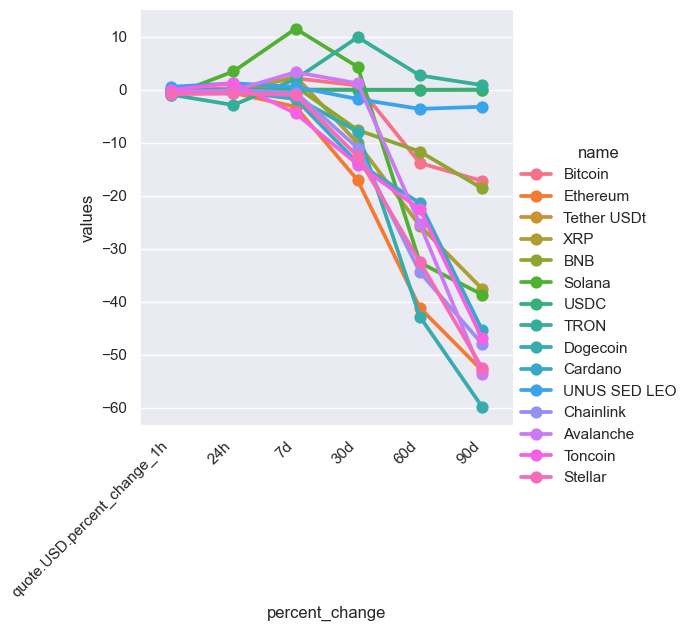

In [87]:
g = sns.catplot(
    x='percent_change', 
    y='values', 
    hue='name', 
    data=df7, 
    kind='point'
)
g.set_xticklabels(rotation=45, ha='right')

plt.show()

In [53]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,84141.69874,2025-04-17 08:04:15.236171
15,Bitcoin,84087.16256,2025-04-17 08:07:30.988345
30,Bitcoin,84065.48297,2025-04-17 08:08:32.107509
45,Bitcoin,84121.46278,2025-04-17 08:15:28.565695
60,Bitcoin,84118.04655,2025-04-17 08:16:29.339233


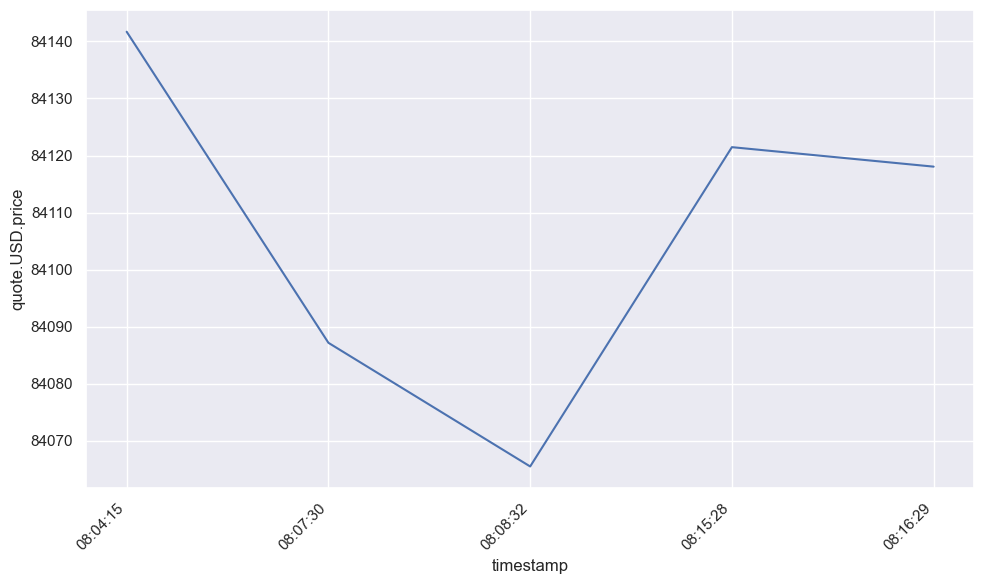

In [95]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(10, 6))

sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)


plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()